### Blockchain project #2
This file will be our main file for this project. 
Lets explain our process here
First start of with creating block and blockchain class.
We need to force a fork such that the smaller fork can be the uncle
implement reward.

### Tasks: 
- model a blockchain that uses uncle and uncle rewards
- model a rewarding mechanism to reward uncle block creators
- model selfish mining (only one attacker) in this blockchain

### Answer the following questions: 
- How do uncles improve the fairness of the blockchain? For this, you should compare the outcome of miners with and without uncles

- What is the impact of the uncles on selfish mining? Is selfish mining more profitable with uncles?

- What does it mean in this model for the selfish mining attack to be profitable?
= If a selfish miner mines a block, and is not chosen to be in the longest chain. Normally the block is discarded without any reward. However with uncles, the selfish mined block will receive reward for using resources to mine a block. Therefore the selfish miner, will receive reward either if he succeeds in creating an accepted block or not. Thus selfish mining will always be "worth the power". 

Start off with declearing block, miner and blockchain:

In [235]:
#import statements
from IPython.display import HTML, display
import hashlib as hasher
import random
import pandas as pd
BASEREWARD = 10 #Base reward
UNCLEREWARD = 5 #Base uncle reward
NEPHEWREWARD = 2 #Base nephew reward
def hashbits(input):
    hash_obj = hasher.sha256()
    inputbytes = input.encode()
    hash_obj.update(inputbytes)
    hashbytes = hash_obj.digest()
    return ''.join(f'{x:08b}' for x in hashbytes)

def hash(input):
    hash_obj = hasher.sha256()
    inputbytes = input.decode()
    hash_obj.update(inputbytes)
    return hash_obj.hexdigest()

def numberOfInitZeros(hashStr):
    count = 0
    for i in range(0, len(hashStr)):
        if hashStr[i] == '1':
            break
        count += 1
    return count

class Block: 
    def __init__(self, data, creator=None, previous=None, nonce=0):
        self.data = data
        if previous is None:
            self.previous = None
            self.previous_hash = ""
            self.creator = Miner(0, "0")
            self.height = 0
            
        else: 
            self.previous = previous
            self.previous_hash = previous.hash
            self.creator = creator
            self.height = previous.height+1
        self.nonce = nonce
        self.hash = self.hash_block()
        self.children = []
    
    def hash_block(self):
        return hashbits(self.data+self.creator.name+self.previous_hash+str(self.nonce))

    def print(self):
        print(self.data+" "+self.creator.name+" "+str(self.height))

class Blockchain:
    def __init__(self, genesis_data, difficulty):
        self.chain = []
        self.forked = []
        self.mainchain = []
        self.mainchainPrint = []
        self.uncles = []
        self.uncleBlocks = []
        self.chain.append(Block(genesis_data))
        self.difficulty = difficulty
        self.size = 0
    
    def longestChain(self):
        max = self.chain[0].height
        for block in self.chain:
            if block.height > max:
                max = block.height
        maxes = [block for block in self.chain if block.height == max]
        
        r = random.choices(maxes, k=1)
        return r[0]
    
    def add(self, newBlock):
        self.chain.append(newBlock)
        newBlock.previous.children.append(newBlock)
        self.size += 1

    def print(self):
        for block in self.chain:
            block.print()
            print("______")

    def hasFork(self): #her kan vi kanskje definere hvem som er onkel        
        for block1 in self.chain:
            for block2 in self.chain:
                if block1 != block2 and block1.height == block2.height:
                    return True
        return False

    def checkMiner(self, miner):
        last = self.longestChain()
        count = 0
        while last != None:
            if last.creator == miner:
                count += 1
            last = last.previous
        return count

    def createMainChain(self):
        lb = self.longestChain()
        while lb.previous != None or lb.height ==0:
            self.mainchain.append(lb)
            self.mainchainPrint.append(lb.creator.name)
            if lb.height == 0:
                break
            lb = lb.previous
 
    def getUncles(self):
        for block in self.chain:
            if block not in self.mainchain:
                self.uncles.append(block.creator.name)
    def getUnclesBlock(self):
        for block in self.chain:
            if block not in self.mainchain:
                self.uncleBlocks.append(block)
   
def bitToHex(bitBlock):
    return hex(int(bitBlock,2))

class Miner:
    def __init__(self, miningPower, name, blockchain=None):
        self.reward = 0 # added reward attribute
        self.miningPower = miningPower
        self.nonce = random.randint(0,100000)
        self.name = name
        self.MinedLastBlock = False
        self.blockchain = blockchain
        if self.blockchain != None:
            self.lastBlock = blockchain.longestChain()

    
    def UpdateLast(self):
        latest = self.blockchain.longestChain()             
        if latest.height > self.lastBlock.height:
            self.lastBlock = latest
         
    
    def PoWSolver(self):
        for i in range(0, self.miningPower):
            newBlock = Block(str(self.blockchain.size), self, self.lastBlock, self.nonce)
            h = newBlock.hash_block()
            count = numberOfInitZeros(h)
            if count >= bc.difficulty:
                bc.add(newBlock)
                self.lastBlock = newBlock
                self.MinedLastBlock = True
            self.nonce += 1
            


In [236]:
#Drawing the blockchain
def maxHeight(parent):
  if len(parent.children) == 0:
    return parent.height 
  max = 0
  for child in parent.children:
    m = maxHeight(child)
    if m> max:
      max = m
  return max
  

def drawBlockchain(parent, level, html, parentLevel, childN = 0, total = 0):
  color = "#AEF751"
  if parentLevel!=-1:
    color = "#7EDBF6"

    #elif type(parent.creator) is SelfishMiner:
    #  color = "#F59AEE"
  parent.children.sort(key=lambda x: (maxHeight(x)), reverse=True)
  xx = childN
  level += childN
  html += '<g>'
  html += '<rect x="'+str(30+ 100*parent.height)+'" y="'+str(30+ 100*level)+'" width="60" height="60" stroke="black" stroke-width="1" fill="'+color+'" />'
  html += '<text x="'+str((60+ 100*parent.height))+'" y="'+str((60+ 100*level))+'" dominant-baseline="middle" text-anchor="middle" font-family="Verdana" font-size="10" font-weight="bold" fill="black">'+str(parent.creator.name)+'</text>'
  if parentLevel != -1:
    if (parent.previous.children.index(parent)) == 0:
      html += '<line stroke-width="1px" stroke="#000000"  x1='+str(30+ 100*parent.height)+' y1="'+str(60+ 100*level)+'" x2="'+str(95+ 100*parent.previous.height)+'" y2="'+str(60+ 100*parentLevel)+'" style="marker-end: url(#markerArrow)"/>'
    else:
      html += '<line stroke-width="1px" stroke="#000000"  x1='+str(30+ 100*parent.height)+' y1="'+str(60+ 100*level)+'" x2="'+str(65+ 100*parent.previous.height)+'" y2="'+str(95+ 100*parentLevel)+'" style="marker-end: url(#markerArrow)"/>'
  html += '</g>'
  l = level
  childN = 0
  for child in parent.children:
    html,n, t = drawBlockchain(child, l, html, level, childN, total)
    if n > 0:
      childN += n
    if t > 0:
      total += t
    l = l+1
  return html, childN+ len(parent.children)-1, total+ len(parent.children)-1


def show(bc):
  htmll = ""
  html = ""
  htmll, n, t = drawBlockchain(bc.chain[0], 0, html, -1)
  html = '<svg height="'+str(115*(n+1))+'" width="'+str(115*maxHeight(bc.chain[0]))+'">'
  html += '<defs><marker id="markerArrow" markerWidth="10" markerHeight="10" refX="2" refY="6" orient="auto"><path d="M2,2 L2,11 L10,6 L2,2" style="fill: #000000;" /> </marker> </defs>'
  html += htmll
  html += '</svg>'
  display(HTML(html))

# a simple function calculating base rewards not worrying about uncle
def calculateBaseRewards(miners, mainchain):
  for minerName in mainchain:
    for miner in miners: 
      if miner.name == minerName:
        miner.reward += BASEREWARD

# calculating unclerewards
def calculateUncleRewards(miners, uncleChain, mainchain):
  for block in uncleChain:  
    minerName = block.creator.name 
    height = block.height 
    for mainBlock in mainchain:
      if mainBlock.height == height:
        nephewName = mainBlock.creator.name

    for miner in miners: 
      if miner.name == minerName:
        miner.reward += UNCLEREWARD
      if miner.name == nephewName:
        miner.reward += NEPHEWREWARD

def showRewards(miners):
  for m in miners:
    print(m.name," earned: ", m.reward," coins")

def visualizeRewards(miners, withOrWithout):
  names = []
  coins = []
  for m in miners:
    names.append(m.name)
    coins.append(m.reward)

  plotdata = pd.DataFrame({"coins": coins}, index= names)
  average=  sum(coins)/len(coins)
  s = "Coins rewarded "+ withOrWithout+ " uncle reward : "+ str(sum(coins))+" average: " + str(average)  
 # plotdata.append(plotdata.mean())
  plotdata.plot(kind="bar", xlabel= "miners", ylabel="reward", title= s)
    


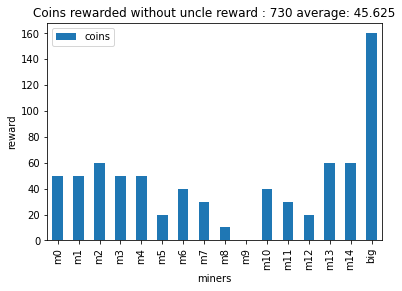

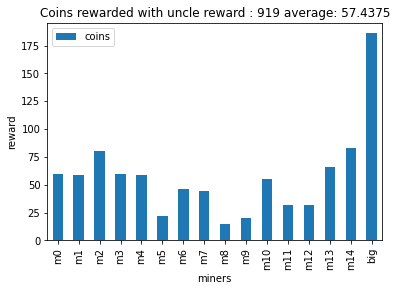

In [237]:
#Declearing blockchain and printing properties
bc = Blockchain("0", 5)
miners = []
for i in range(15):
    m = Miner(1, "m"+str(i), bc)
    miners.append(m)

big = Miner(5, "big", bc)
while bc.size < 100:
    big.PoWSolver()

    for m in miners:
        m.PoWSolver()

    big.UpdateLast()
    
    for m in miners:
        m.UpdateLast()
#appended to calculate rewards
miners.append(big)
#print("uncle print:")
bc.createMainChain()
bc.getUncles()
bc.getUnclesBlock()
calculateBaseRewards(miners,bc.mainchainPrint)
visualizeRewards(miners, "without")
calculateUncleRewards(miners, bc.uncleBlocks, bc.mainchain)
#print(bc.hasFork())
#print(bc.uncles)
#print(bc.longestChain().height)
#print(bc.mainchainPrint)
#print(len(bc.mainchain))
#print(bc.size)
#print(showRewards(miners))
visualizeRewards(miners, "with")

#Implementing 

In [238]:
#show(bc)